# Cavity Circuit Representations

In [5]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

## Eigenvector / eigenvalue calculations

In [530]:
def three_stage_modes(L, C, Lcpl, Ccpl, LJ, CJ, debug=False):
    """
    Compute the eigenvalues and eigenvectors for the three stage
    circuit describing the two lowest modes of the cavity + JJ
    """
    # Inductance matrix
    if Lcpl:
        Lmat = np.diag([1./L[0] + 1./Lcpl[0], 
                    1./LJ + 1./Lcpl[0] + 1./Lcpl[1],
                    1./L[1] + 1./Lcpl[1]])
        Loff = np.diag([-2./Lcpl[0], -2./Lcpl[1]], k=1)
        Lmat += Loff + Loff.T
    else:
        Lmat = np.diag([1./L[0], 1./LJ, 1./L[1]])
    
    # Capacitance matrix
    Cmat = np.diag([C[0] + Ccpl[0],
                    CJ + Ccpl[0] + Ccpl[1],
                    C[1]+Ccpl[1]])
    Coff = np.diag([-2 * Ccpl[0], -2 * Ccpl[1]], k=1)
    Cmat += Coff + Coff.T
    
    # Solve the generalized eigenvalue problem
    # A * x = l * B * x
    # L^-1 * x - w^2 * C * x
    evals, evecs = scipy.linalg.eig(Lmat, b=Cmat)
    
    # Print the L^-1 and C matrices
    if debug:
        print(f'L^-1:\n{Lmat}')
        print(f'C:\n{Cmat}')
    
    return np.real(np.sqrt(evals)), evecs

In [630]:
def five_stage_modes(L, C, Lcpl, Ccpl, LJ, CJ, debug=False):
    """
    Compute the eigenvalues and eigenvectors for the three stage
    circuit describing the two lowest modes of the cavity + JJ
    """
    # Inductance matrix
    if Lcpl:
        Lmat = np.diag([1./L[0] + 1./Lcpl[0],
                        1./L[1] + 1./Lcpl[0] + 1./Lcpl[1],
                        1./LJ + 1./Lcpl[1] + 1./Lcpl[2],
                        1./L[2] + 1./Lcpl[2] + 1./Lcpl[3],
                        1./L[3] + 1./Lcpl[3]])
        Loff = np.diag([-2./Lcpl[0], -2./Lcpl[1],
                        -2./Lcpl[2], -2./Lcpl[3]], k=1)
        Lmat += Loff + Loff.T
    else:
        Lmat = np.diag([1./L[0], 1./L[1], 1./LJ, 1./L[2], 1./L[3]])
    
    # Capacitance matrix
    Cmat = np.diag([C[0] + Ccpl[0],
                    C[1] + Ccpl[0] + Ccpl[1],
                    CJ + Ccpl[1] + Ccpl[2],
                    C[2] + Ccpl[2] + Ccpl[3],
                    C[3] + Ccpl[3]])
    Coff = np.diag([-2 * Ccpl[0], -2 * Ccpl[1],
                    -2 * Ccpl[2], -2 * Ccpl[3]], k=1)
    Cmat += Coff + Coff.T
    
    # Solve the generalized eigenvalue problem
    # A * x = l * B * x
    # L^-1 * x - w^2 * C * x
    evals, evecs = scipy.linalg.eig(Lmat, b=Cmat)
    
    # Print the L^-1 and C matrices
    if debug:
        print(f'L^-1:\n{Lmat}')
        print(f'C:\n{Cmat}')
    
    return np.real(np.sqrt(evals)), evecs

In [633]:
five_stage_modes([1]*4, [1]*4, [1.]*4, [0.5]*4, 0.1, 1., debug=True)

L^-1:
[[ 2. -2.  0.  0.  0.]
 [-2.  3. -2.  0.  0.]
 [ 0. -2. 12. -2.  0.]
 [ 0.  0. -2.  3. -2.]
 [ 0.  0.  0. -2.  2.]]
C:
[[ 1.5 -1.   0.   0.   0. ]
 [-1.   2.  -1.   0.   0. ]
 [ 0.  -1.   2.  -1.   0. ]
 [ 0.   0.  -1.   2.  -1. ]
 [ 0.   0.   0.  -1.   1.5]]


(array([3.87824528, 0.57060198, 0.78077641, 1.28077641, 1.27813417]),
 array([[ 2.86956692e-01,  5.19806863e-01, -5.57345410e-01,
          4.35162146e-01,  4.45710600e-01],
        [ 4.52439593e-01,  4.69269115e-01, -4.35162146e-01,
         -5.57345410e-01, -5.47982644e-01],
        [ 6.52616689e-01,  1.38472549e-01, -1.05179267e-16,
         -9.72928869e-16, -4.59800549e-02],
        [ 4.52439593e-01,  4.69269115e-01,  4.35162146e-01,
          5.57345410e-01, -5.47982644e-01],
        [ 2.86956692e-01,  5.19806863e-01,  5.57345410e-01,
         -4.35162146e-01,  4.45710600e-01]]))

## Plotting macros

In [634]:
def set_axes_fonts(ax, fsize):
    """
    Set axes font sizes because it should be abstracted away
    """
    for tick in ax.get_xticklabels():
        tick.set_fontsize(fsize)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(fsize)

In [635]:
def set_xaxis_rot(ax, angle=45):
    """
    Rotate the x-axis labels
    """
        
    for tick in ax.get_xticklabels():
        tick.set_rotation(angle)

In [636]:
def set_leg_outside(ax, fsize):
    """
    Sets the legend location outside
    """
    
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
    # Put a legend to the right of the current axis
    hdls, legs = ax.get_legend_handles_labels()
    leg = ax.legend(hdls, legs, loc='center left', bbox_to_anchor=(1, 0.5), \
                    fontsize=fsize, framealpha=0.)

    return leg

## Inspect the eigenvalues and eigenvectors vs. $L_J$

### Three stage version

In [845]:
# Logarithmically spaced LJ values
LJs = np.array([0.1, 0.1, 1, 10, 100]) # nH

# Set all stage inductors and capacitors to be equal
L = [4.] * 2 # nH
fa = 6.735 # GHz
fb = 7.735 # GHz
C = [1./(L[0]*(2*fa*np.pi)**2), 1./(L[1]*(2*fb*np.pi)**2)] # nF
Cj = 2e-6 # 2 fF self-capacitance
Cs = 8.85e-6 # 8.85 fF shunt capacitance from aperature
CJ = Cj + Cs
Lcpl = None # [75] * 2 # nH
Ccpl = [15e-6] * 2 # nF
print(f'wJ: {1./(2*np.pi*(np.sqrt(CJ))):.3f} GHz')
print(f'wa: {1./(2*np.pi*np.sqrt(L[0]*C[0])):.3f} GHz')
print(f'wb: {1./(2*np.pi*np.sqrt(L[1]*C[1])):.3f} GHz')
print(f'Ca: {C[0] * 1e6:.3f} fF')
print(f'Cb: {C[1] * 1e6:.3f} fF')

wJ: 48.318 GHz
wa: 6.735 GHz
wb: 7.735 GHz
Ca: 139.606 fF
Cb: 105.842 fF


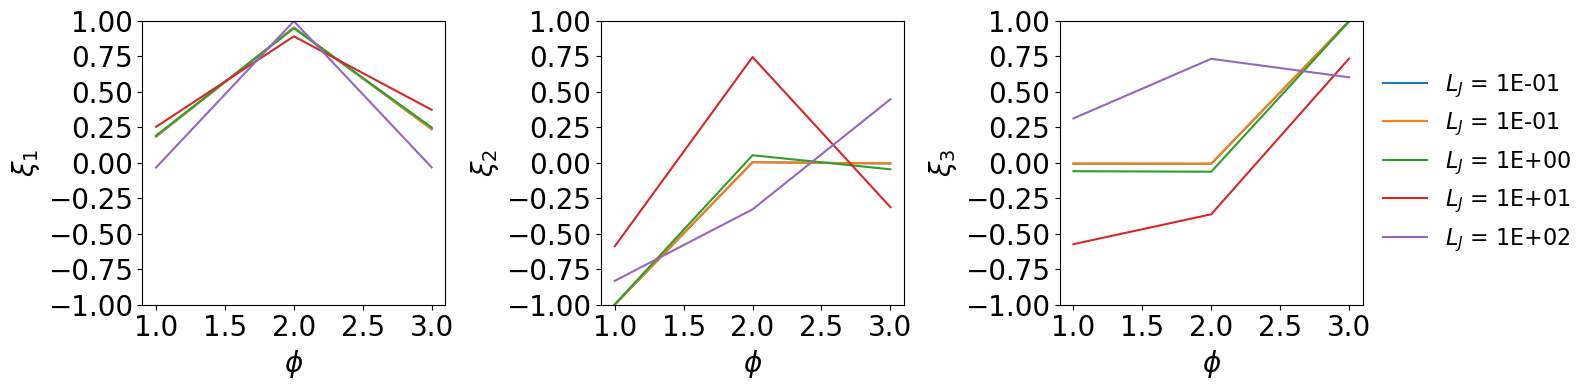

In [846]:
# Start the figure
fig, ax = plt.subplots(1, 3, figsize=(16, 4), tight_layout=True)
fsize = 20; lsize = 16
dstr = datetime.datetime.today().strftime('%y%m%d')

# Compute the eigenvalues and eigenvectors on-the-fly
for idx, LJ in enumerate(LJs):
    evals, evecs = three_stage_modes(L, C, Lcpl, Ccpl, LJ, CJ)
    for cidx in range(3):
        ax[cidx].plot([1, 2, 3],
                     evecs[:, cidx], label=r'$L_J$ = %.0E' % LJ)

        ax[cidx].set_xlabel('$\phi$', fontsize=fsize)
        ax[cidx].set_ylabel(r'$\xi_{%d}$' % (cidx + 1), fontsize=fsize)
        set_axes_fonts(ax[cidx], fsize)
        ax[cidx].set_ylim([-1, 1])
        
set_leg_outside(ax[2], lsize)
fig.savefig(f'../figs/evecs_three_stage_{dstr}.pdf',
           format='pdf')

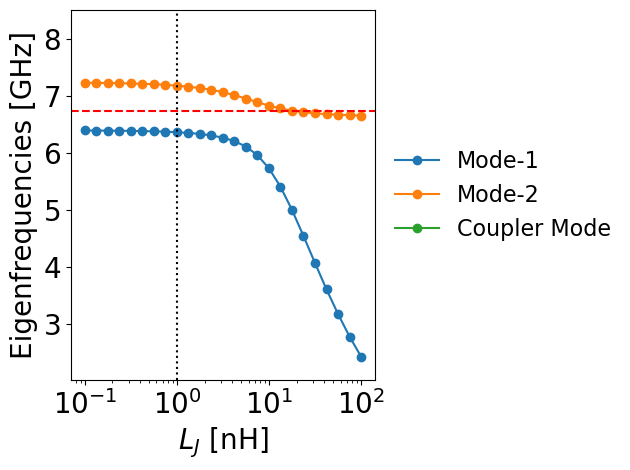

In [847]:
# Compute the eigenvalues
LJsfull = np.logspace(np.log10(0.1), np.log10(100), 25)
evs = np.zeros([3, len(LJsfull)])
for Lidx, LJ in enumerate(LJsfull):
    evv, _ = three_stage_modes(L, C, Lcpl, Ccpl, LJ, CJ)
    evs[:, Lidx] = np.sort(evv)
    
# Plot the eigenvalues
fig_ev, ax_ev = plt.subplots(1, 1, tight_layout=True)
for widx, w in enumerate(evs):
    if widx == 2:
        label = 'Coupler Mode'
    else:
        label = f'Mode-{widx+1}'
    ax_ev.plot(LJsfull, w / (2*np.pi), 'o-', label=label)
ax_ev.set_xlabel(r'$L_J$ [nH]', fontsize=fsize)
ax_ev.set_ylabel(r'Eigenfrequencies [GHz]', fontsize=fsize)
ax_ev.set_xscale('log')
#ax_ev.set_yscale('log')
ax_ev.set_ylim([0.3 * fa, 1.1 * fb])
ax_ev.axhline(y=0, ls='--', color='k')
ax_ev.axvline(x=1, ls=':', color='k')
ax_ev.axhline(y=fa, ls='--', color='r')
set_axes_fonts(ax_ev, fsize)
set_leg_outside(ax_ev, lsize)
fig_ev.savefig(f'../figs/evals_three_stage_{dstr}.pdf',
              format='pdf')

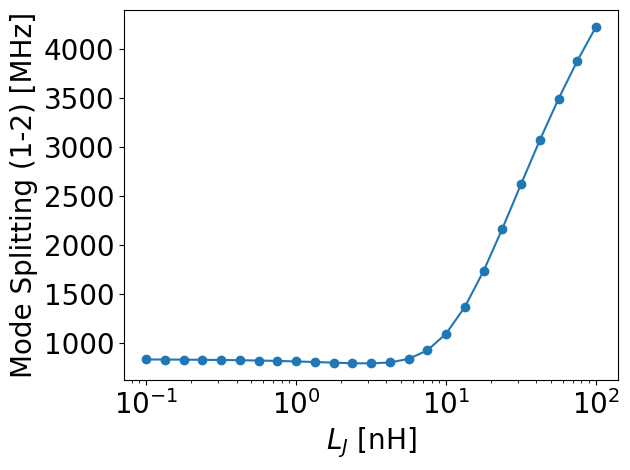

In [849]:
# Compute the eigenvalues
LJsfull = np.logspace(np.log10(0.1), np.log10(100), 25)
evs = np.zeros([3, len(LJsfull)])
for Lidx, LJ in enumerate(LJsfull):
    evv, _ = three_stage_modes(L, C, Lcpl, Ccpl, LJ, CJ)
    evs[:, Lidx] = np.sort(evv)
    
# Plot the eigenvalues
fig_ev, ax_ev = plt.subplots(1, 1, tight_layout=True)
ax_ev.plot(LJsfull, (evs[1] - evs[0]) / (1e-3 * 2*np.pi), 'o-')
ax_ev.set_xlabel(r'$L_J$ [nH]', fontsize=fsize)
ax_ev.set_ylabel(r'Mode Splitting (1-2) [MHz]', fontsize=fsize)
ax_ev.set_xscale('log')
#ax_ev.set_yscale('log')
# ax_ev.set_ylim([0, 10])
set_axes_fonts(ax_ev, fsize)
fig_ev.savefig(f'../figs/evals_three_stage_{dstr}.pdf',
              format='pdf')

### Five stage version

In [887]:
# Logarithmically spaced LJ values
LJs = np.array([0.1, 1, 10, 100]) # nH

# Set all stage inductors and capacitors to be equal
L = [4.] * 4 # nH
fa = 6.735 # GHz
fb = 7.735 # GHz
C = [1./(L[0]*(2*fa*np.pi)**2), 
     1./(L[0]*(2*2*fa*np.pi)**2), 
     1./(L[1]*(2*fb*np.pi)**2),
      1./(L[1]*(2*2*fb*np.pi)**2)
    ] # nF
Cj = 2e-6 # 2 fF self-capacitance
Cs = 8.85e-6 # 8.85 fF shunt capacitance from aperature
CJ = Cj + Cs
Lcpl = [12] * 4 # nH
Ccpl = [0] * 4 #[22e-6] * 4 # nF
print(f'wJ: {1./(2*np.pi*(np.sqrt(CJ))):.3f} GHz')
print(f'wa1: {1./(2*np.pi*np.sqrt(L[0]*C[0])):.3f} GHz')
print(f'wa2: {1./(2*np.pi*np.sqrt(L[1]*C[1])):.3f} GHz')
print(f'wb1: {1./(2*np.pi*np.sqrt(L[2]*C[2])):.3f} GHz')
print(f'wb2: {1./(2*np.pi*np.sqrt(L[3]*C[3])):.3f} GHz')
print(f'Ca: {C[0] * 1e6:.3f} fF')
print(f'Cb: {C[2] * 1e6:.3f} fF')

wJ: 48.318 GHz
wa1: 6.735 GHz
wa2: 13.470 GHz
wb1: 7.735 GHz
wb2: 15.470 GHz
Ca: 139.606 fF
Cb: 105.842 fF


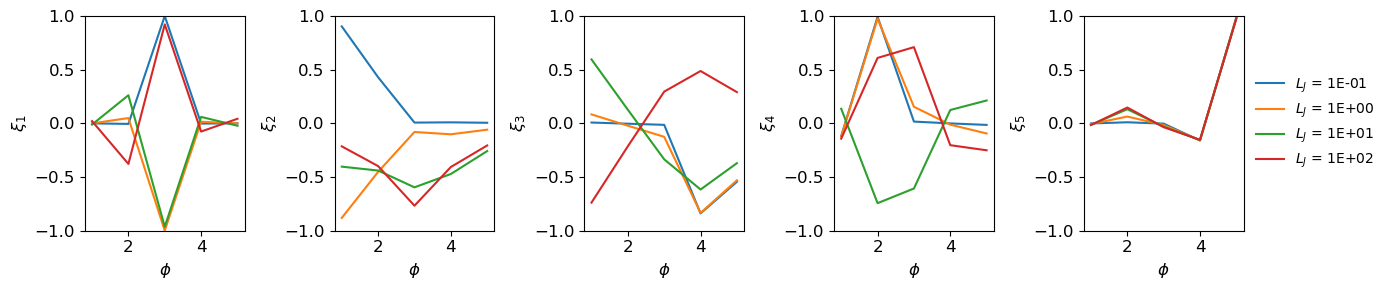

In [888]:
# Start the figure
fig, ax = plt.subplots(1, 5, figsize=(14, 3), tight_layout=True)
fsize = 12; lsize = 10
dstr = datetime.datetime.today().strftime('%y%m%d')

# Compute the eigenvalues and eigenvectors on-the-fly
for idx, LJ in enumerate(LJs):
    evals, evecs = five_stage_modes(L, C, Lcpl, Ccpl, LJ, CJ)
    for cidx in range(5):
        ax[cidx].plot([1, 2, 3, 4, 5],
                     evecs[:, cidx], label=r'$L_J$ = %.0E' % LJ)

        ax[cidx].set_xlabel('$\phi$', fontsize=fsize)
        ax[cidx].set_ylabel(r'$\xi_{%d}$' % (cidx + 1), fontsize=fsize)
        set_axes_fonts(ax[cidx], fsize)
        ax[cidx].set_ylim([-1, 1])
        
set_leg_outside(ax[4], lsize)
fig.savefig(f'../figs/evecs_five_stage_{dstr}.pdf',
           format='pdf')

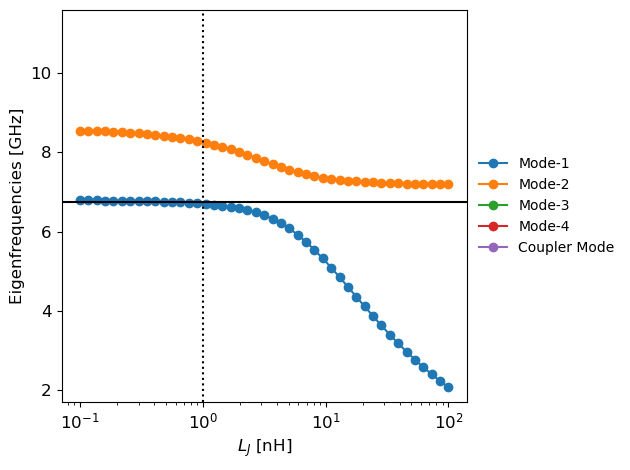

In [904]:
# Compute the eigenvalues
LJsfull = np.logspace(np.log10(0.1), np.log10(100), 45)
evs = np.zeros([5, len(LJsfull)])
for Lidx, LJ in enumerate(LJsfull):
    evv, _ = five_stage_modes(L, C, Lcpl, Ccpl, LJ, CJ)
    evs[:, Lidx] = np.sort(evv)
    
# Plot the eigenvalues
fig_ev, ax_ev = plt.subplots(1, 1, tight_layout=True)
for widx, w in enumerate(evs):
    if widx == 4:
        label = 'Coupler Mode'
    else:
        label = f'Mode-{widx+1}'
    ax_ev.plot(LJsfull, w / (2*np.pi), 'o-', label=label)
ax_ev.set_xlabel(r'$L_J$ [nH]', fontsize=fsize)
ax_ev.set_ylabel(r'Eigenfrequencies [GHz]', fontsize=fsize)
ax_ev.set_xscale('log')
#ax_ev.set_yscale('log')
ax_ev.set_ylim([0.25*fa, 1.5*fb])
# ax_ev.set_ylim([-0.5, 1.5/(2*np.pi*(np.sqrt(CJ)))]) #3 * fb])
ax_ev.axhline(y=0, ls='--', color='k')
ax_ev.axvline(x=1, ls=':', color='k')
ax_ev.axhline(y=fa, ls='-', color='k')
ax_ev.axhline(y=abs(fa-fb), ls='-.', color='r')
ax_ev.axhline(y=abs(fa+fb), ls='-.', color='b')
ax_ev.axhline(y=2*fa, ls='-.', color='g')
ax_ev.axhline(y=2*fb, ls='-.', color='g')
ax_ev.axhline(y=1./(2*np.pi*(np.sqrt(CJ))), ls=':', color='k')
set_axes_fonts(ax_ev, fsize)
set_leg_outside(ax_ev, lsize)
fig_ev.savefig(f'../figs/evals_five_stage_{dstr}.pdf',
              format='pdf')

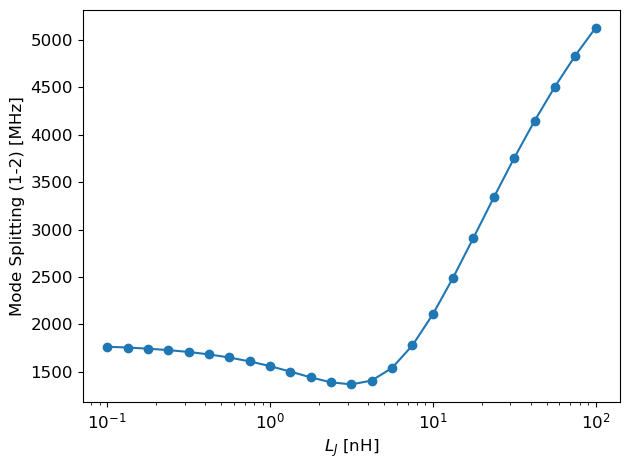

In [890]:
# Compute the eigenvalues
LJsfull = np.logspace(np.log10(0.1), np.log10(100), 25)
evs = np.zeros([5, len(LJsfull)])
for Lidx, LJ in enumerate(LJsfull):
    evv, _ = five_stage_modes(L, C, Lcpl, Ccpl, LJ, CJ)
    evs[:, Lidx] = np.sort(evv)
    
# Plot the eigenvalues
fig_ev, ax_ev = plt.subplots(1, 1, tight_layout=True)
ax_ev.plot(LJsfull, (evs[1] - evs[0]) / (1e-3 * 2*np.pi), 'o-')
ax_ev.set_xlabel(r'$L_J$ [nH]', fontsize=fsize)
ax_ev.set_ylabel(r'Mode Splitting (1-2) [MHz]', fontsize=fsize)
ax_ev.set_xscale('log')
#ax_ev.set_yscale('log')
# ax_ev.set_ylim([0, 10])
set_axes_fonts(ax_ev, fsize)
fig_ev.savefig(f'../figs/evals_five_stage_{dstr}.pdf',
              format='pdf')